# Stock Price Prediction Using LSTM

In [1]:
!pip install yfinance

In [2]:
import yfinance as yf

In [94]:
stock_symbol = "EREGL.IS"

In [95]:
data = yf.download(tickers = stock_symbol,start="2021-01-01",end = "2022-10-10",interval = "1h")

[*********************100%***********************]  1 of 1 completed


In [96]:
data.head(15)

,Open,High,Low,Close,Adj Close,Volume
2021-01-04 10:30:00+03:00,14.86,14.95,14.85,14.93,14.93,2809715
2021-01-04 11:30:00+03:00,14.93,14.96,14.88,14.93,14.93,1566558
2021-01-04 12:30:00+03:00,14.93,15.10,14.91,15.01,15.01,2856536
2021-01-04 13:30:00+03:00,15.01,15.04,14.90,14.92,14.92,2113516
2021-01-04 14:30:00+03:00,14.91,14.93,14.73,14.84,14.84,3430992
2021-01-04 15:30:00+03:00,14.84,14.90,14.80,14.81,14.81,2123880
2021-01-04 16:30:00+03:00,14.80,14.83,14.76,14.82,14.82,1844437
2021-01-04 17:30:00+03:00,14.82,14.82,14.79,14.80,14.80,1744276
2021-01-05 10:30:00+03:00,14.97,14.98,14.77,14.78,14.78,4793225
2021-01-05 11:30:00+03:00,14.78,14.81,14.73,14.77,14.77,2526962


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3571 entries, 2021-01-04 10:30:00+03:00 to 2022-10-07 17:30:00+03:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3571 non-null   float64
 1   High       3571 non-null   float64
 2   Low        3571 non-null   float64
 3   Close      3571 non-null   float64
 4   Adj Close  3571 non-null   float64
 5   Volume     3571 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 195.3 KB


<AxesSubplot:>

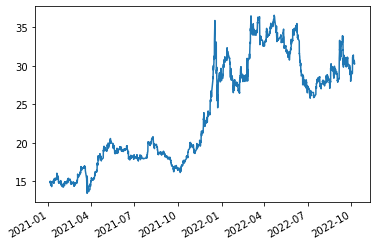

In [98]:
data["Open"].plot()

In [99]:
import matplotlib.pyplot as plt

In [100]:
do = data["Open"].values

In [101]:
do

array([14.85999966, 14.93000031, 14.93000031, ..., 30.34000015,
       30.29999924, 30.28000069])

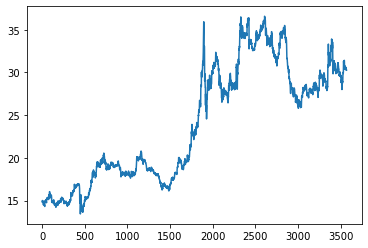

In [102]:
plt.plot(do)

In [103]:
import numpy as np

In [104]:
from sklearn.preprocessing import MinMaxScaler

In [105]:
np.array(do)

array([14.85999966, 14.93000031, 14.93000031, ..., 30.34000015,
       30.29999924, 30.28000069])

In [106]:
normalization = MinMaxScaler(feature_range=(0,1))
do_scaled = normalization.fit_transform(np.array(do).reshape(-1,1))

In [107]:
do_scaled

array([[0.0613656 ],
       [0.06439069],
       [0.06439069],
       ...,
       [0.73033703],
       [0.72860838],
       [0.72774414]])

In [108]:
len(do_scaled) == len(do)

True

In [109]:
train_do_size = int(len(do_scaled)*0.75)

In [110]:
test_do_size = len(do_scaled) - train_do_size

In [111]:
train_do_size

2678

In [112]:
test_do_size

893

In [113]:
do_train,do_test = do_scaled[0:train_do_size,:],do_scaled[train_do_size:len(do_scaled),:1]

In [114]:
len(do_train), len(do_test)

(2678, 893)

In [115]:
#Dataseti LSTM modeli için zaman serisi ile hazırlama
def create_do(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [116]:
time_stamp = 300
X_train, y_train = create_do(do_train,time_stamp)
X_test, y_test = create_do(do_test,time_stamp)

In [117]:
X_train

array([[0.0613656 , 0.06439069, 0.06439069, ..., 0.04407953, 0.04451169,
        0.04753674],
       [0.06439069, 0.06439069, 0.0678479 , ..., 0.04451169, 0.04753674,
        0.0462403 ],
       [0.06439069, 0.0678479 , 0.06352637, ..., 0.04753674, 0.0462403 ,
        0.04969751],
       ...,
       [0.91011229, 0.91011229, 0.90319786, ..., 0.84874677, 0.84788245,
        0.85047526],
       [0.91011229, 0.90319786, 0.89801208, ..., 0.84788245, 0.85047526,
        0.85047526],
       [0.90319786, 0.89801208, 0.89023333, ..., 0.85047526, 0.85047526,
        0.84788245]])

In [118]:
y_train

array([0.0462403 , 0.04969751, 0.04537598, ..., 0.85047526, 0.84788245,
       0.86862573])

In [119]:
X_train.shape,y_train.shape

((2377, 300), (2377,))

In [120]:
X_test.shape,y_test.shape

((592, 300), (592,))

In [121]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [122]:
X_train[1][1]

array([0.06439069])

In [123]:
X_test

array([[[0.86257563],
        [0.85306823],
        [0.84874677],
        ...,
        [0.57044073],
        [0.56784784],
        [0.59636987]],

       [[0.85306823],
        [0.84874677],
        [0.85306823],
        ...,
        [0.56784784],
        [0.59636987],
        [0.59636987]],

       [[0.84874677],
        [0.85306823],
        [0.86343979],
        ...,
        [0.59636987],
        [0.59636987],
        [0.59031977]],

       ...,

       [[0.7078651 ],
        [0.69057904],
        [0.68712182],
        ...,
        [0.73811578],
        [0.73638714],
        [0.73379425]],

       [[0.69057904],
        [0.68712182],
        [0.69317193],
        ...,
        [0.73638714],
        [0.73379425],
        [0.72774414]],

       [[0.68712182],
        [0.69317193],
        [0.70527222],
        ...,
        [0.73379425],
        [0.72774414],
        [0.73033703]]])

In [33]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [34]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [124]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 300, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 300, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [125]:
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=25,batch_size=64)

Epoch 1/25
38/38 [==============================] - 23s 486ms/step - loss: 0.0290 - val_loss: 0.0034
Epoch 2/25
38/38 [==============================] - 16s 434ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 3/25
38/38 [==============================] - 16s 422ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 4/25
38/38 [==============================] - 16s 420ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 5/25
38/38 [==============================] - 16s 434ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 6/25
38/38 [==============================] - 16s 426ms/step - loss: 9.8720e-04 - val_loss: 9.8367e-04
Epoch 7/25
38/38 [==============================] - 16s 428ms/step - loss: 9.2522e-04 - val_loss: 0.0011
Epoch 8/25
38/38 [==============================] - 16s 424ms/step - loss: 8.8602e-04 - val_loss: 9.7676e-04
Epoch 9/25
38/38 [==============================] - 16s 423ms/step - loss: 8.2058e-04 - val_loss: 8.3838e-04
Epoch 10/25
38/38 [==============================] - 16s 419ms/

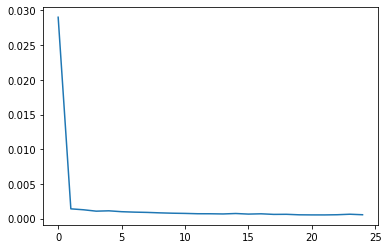

In [126]:
loss = model.history.history['loss']
plt.plot(loss)

In [127]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

19/19 [==============================] - 2s 82ms/step


In [128]:
train_predict = normalization.inverse_transform(train_predict)
test_predict = normalization.inverse_transform(test_predict)

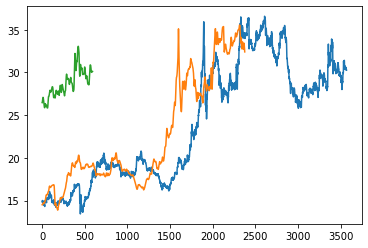

In [129]:
plt.plot(normalization.inverse_transform(do_scaled))
plt.plot(train_predict)
plt.plot(test_predict)

In [130]:
test = np.vstack((train_predict,test_predict))

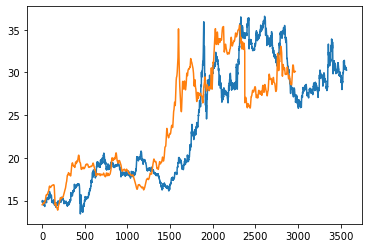

In [131]:
plt.plot(normalization.inverse_transform(do_scaled))
plt.plot(test)

In [132]:
len(do_test)

893

In [133]:
fut_inp = do_test[593:]

In [134]:
fut_inp = fut_inp.reshape(1,-1)

In [135]:
tmp_inp = list(fut_inp)

In [136]:
fut_inp.shape

(1, 300)

In [137]:
tmp_inp = tmp_inp[0].tolist()

In [138]:
lst_output=[]
n_steps=299
i=0
while(i<70):
    
    if(len(tmp_inp)>100):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

[[0.7191741466522217], [0.7173425555229187], [0.7149404883384705], [0.712088406085968], [0.7089244723320007], [0.7055705189704895], [0.7021204233169556], [0.6986395716667175], [0.6951694488525391], [0.691736102104187], [0.6883549690246582], [0.6850345134735107], [0.6817806363105774], [0.6785964965820312], [0.6754847764968872], [0.6724463701248169], [0.6694813370704651], [0.6665893197059631], [0.6637686491012573], [0.6610171794891357], [0.6583318710327148], [0.6557091474533081], [0.6531456112861633], [0.6506373286247253], [0.6481803059577942], [0.645770788192749], [0.6434048414230347], [0.6410790681838989], [0.6387901902198792], [0.6365352272987366], [0.6343111991882324], [0.6321159601211548], [0.6299471855163574], [0.6278031468391418], [0.6256821155548096], [0.6235826015472412], [0.6215035319328308], [0.6194438934326172], [0.6174029111862183], [0.6153799295425415], [0.6133743524551392], [0.6113858819007874], [0.6094140410423279], [0.6074585318565369], [0.6055192947387695], [0.603595972

In [139]:
len(do_scaled)

3571

In [140]:
plot_new=np.arange(1,301)
plot_pred=np.arange(301,371)

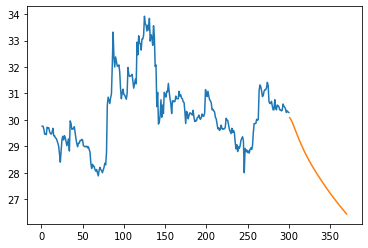

In [142]:
plt.plot(plot_new, normalization.inverse_transform(do_scaled[3271:]))
plt.plot(plot_pred, normalization.inverse_transform(lst_output))

In [143]:
do_new = do_scaled.tolist()

In [144]:
len(do_new)

3571

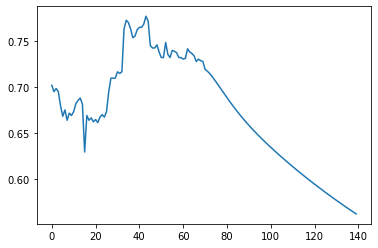

In [145]:
do_new.extend(lst_output)
plt.plot(do_new[3501:])

In [146]:
final_graph = normalization.inverse_transform(do_new).tolist()

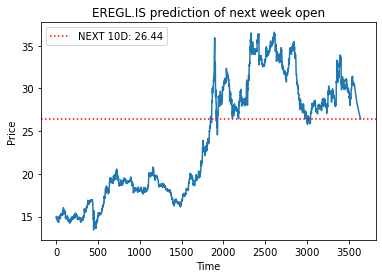

In [147]:
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("{0} prediction of next week open".format(stock_symbol))
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 10D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()